In [1]:
import sys
sys.path.append("..")
from random import seed
import logging
import numpy as np
import matplotlib.pyplot as plt
from federated_learning.helper import utils
CONFIG_PATH = '../configs/defaults.yml'

configs = utils.load_config(CONFIG_PATH)
logging.basicConfig(format='%(asctime)s %(message)s', level=configs['log']['level'])
seed(configs['runtime']['random_seed'])

In [2]:
def draw_samples(data):
    list_keys = list(data.keys())
    data_np = dict()
    data_np['x'] = np.array(data[list_keys[0]]['x'], dtype = np.float32).reshape(-1, 28, 28)
    data_np['y'] = np.array(data[list_keys[0]]['y'], dtype = np.int64).reshape(-1, 1)
    figure = plt.figure(figsize=(10,8))
    for i in range(60):
        plt.subplot(6, 10, i + 1)
        plt.axis("off")
        plt.title(data_np['y'][i])
        plt.imshow(data_np['x'][i], cmap='gray')
        
        
def get_flattted_data(data):
    data_flatted_x = np.array([], dtype = np.float32).reshape(0, 28 * 28)
    tmp_array = [np.array(data_['x'], dtype = np.float32).reshape(-1, 28 * 28) for data_ in data.values()]
    for dd in tmp_array:
        data_flatted_x = np.concatenate((data_flatted_x, dd))
    data_flatted_y = np.array([], dtype = np.float32)
    tmp_array_y = [np.array(data_['y'], dtype = np.int64).reshape(-1) for data_ in data.values()]
    for dd in tmp_array_y:
        data_flatted_y = np.concatenate((data_flatted_y, dd))

    return data_flatted_x, data_flatted_y
        
    
def dataset_info(dataset):
    list_keys = list(dataset.keys())
    numbers = dict()
    # numbers[num_samples] = num_users
    for uu, dd in dataset.items():
        key = str(len(dd['y']))
        if key in numbers:
            numbers[key] += 1
        else:
            numbers[key] = 1
        
    total_samples = 0
    for uu in sorted(numbers.keys()):
        print("{}:\t{}".format(uu, numbers[uu]))
        total_samples += int(uu) * int(numbers[uu])

    print("Mean num of samples/user: {}".format(
        round(np.mean([int(ii) for ii in numbers])), 2))
    print("Total Samples:\t{}".format(total_samples))
    print("Total Users:\t{}".format(len(list_keys)))
    print("[{}]: Images: {}, Pixels: {}".format(
        list_keys[0], 
        len(dataset[list_keys[0]]['x']), 
        len(dataset[list_keys[0]]['x'][0])))
    data_flatted_x, data_flatted_y = get_flattted_data(dataset)
    print("mean: {}\nstd: {},\nmax: {}".format(
            data_flatted_x.mean(), 
            data_flatted_x.std(), 
            data_flatted_x.max()))
    print("-"*5)

2020-12-10 22:04:46,793 Loading train dataset from /home/ubuntu/data/leaf_non_iid/data/femnist/data
2020-12-10 22:04:46,799 Loading 1 out of 2 files...
2020-12-10 22:04:52,489 Loading 2 out of 2 files...
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


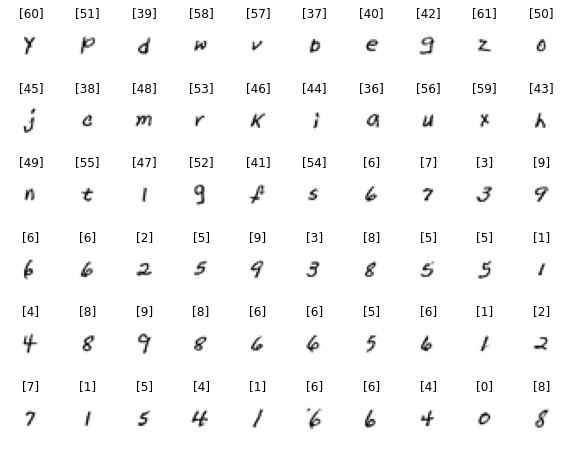

In [3]:
data = utils.load_leaf_train(configs['data']['FEMNIST_PATH'])
draw_samples(data)

2020-12-10 22:05:01,434 Start processing of femnist data...


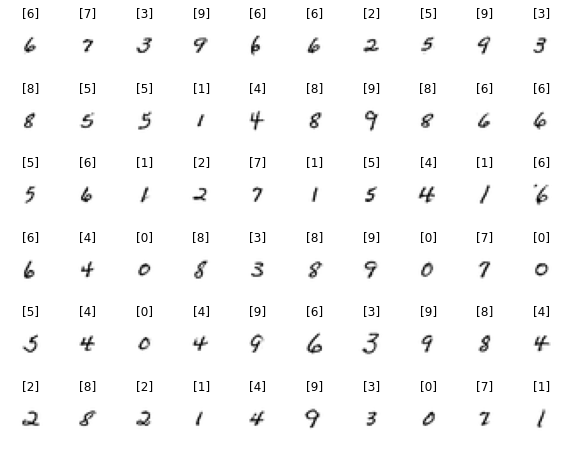

In [4]:
min_num_samples = 100
only_digits = True
processed_data = utils.preprocess_leaf_data(data, min_num_samples, only_digits)
draw_samples(processed_data)

In [5]:
data_test = utils.load_leaf_test(configs['data']['FEMNIST_PATH'])

2020-12-10 22:05:05,590 Loading test dataset from /home/ubuntu/data/leaf_non_iid/data/femnist/data
2020-12-10 22:05:05,593 Loading 1 out of 2 files...
2020-12-10 22:05:06,111 Loading 2 out of 2 files...


In [6]:
dataset_info(data)
print()
dataset_info(processed_data)
print()
dataset_info(data_test)

113:	1
135:	1
159:	1
163:	1
185:	1
189:	1
198:	1
205:	2
210:	1
211:	1
212:	1
215:	1
220:	2
221:	1
222:	1
223:	2
224:	1
230:	1
233:	2
237:	2
243:	3
244:	1
246:	1
248:	1
249:	2
250:	1
251:	1
252:	2
254:	1
255:	1
257:	3
258:	2
260:	1
261:	3
262:	1
263:	1
265:	1
267:	1
268:	2
270:	1
271:	2
272:	3
274:	1
275:	2
277:	1
278:	2
279:	1
283:	2
286:	3
287:	3
288:	2
289:	1
290:	1
291:	1
292:	4
293:	3
295:	2
296:	1
297:	3
300:	1
301:	2
302:	2
303:	1
305:	2
306:	3
307:	1
309:	3
310:	3
311:	1
312:	4
313:	2
315:	4
316:	4
317:	1
318:	3
319:	3
320:	3
323:	2
324:	6
328:	2
329:	1
330:	4
331:	4
332:	3
333:	1
334:	1
335:	3
337:	1
338:	1
339:	1
341:	1
342:	1
345:	1
347:	1
349:	2
351:	2
352:	1
353:	1
354:	3
355:	1
356:	2
357:	1
358:	3
360:	2
361:	1
362:	1
363:	2
368:	2
369:	1
374:	1
378:	1
380:	1
383:	1
393:	1
Mean num of samples/user: 290.0
Total Samples:	59165
Total Users:	200
[f0554_17]: Images: 354, Pixels: 784
mean: 0.9638470411300659
std: 0.1598835587501526,
max: 1.0
-----

100:	1
101:	8
102:	3
103:	8
1

In [7]:
def draw_pca(data_flatted_x, data_flatted_y):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)

    proj = pca.fit_transform(data_flatted_x)
    figure = plt.figure(figsize=(15, 8))
    plt.scatter(proj[:, 0], proj[:,1], c = data_flatted_y, cmap="rainbow")
    plt.ylim([-8, 8])
    plt.colorbar(ticks=range(len(np.unique(data_flatted_y))))

In [8]:
data_flatted_x, data_flatted_y = get_flattted_data(processed_data)

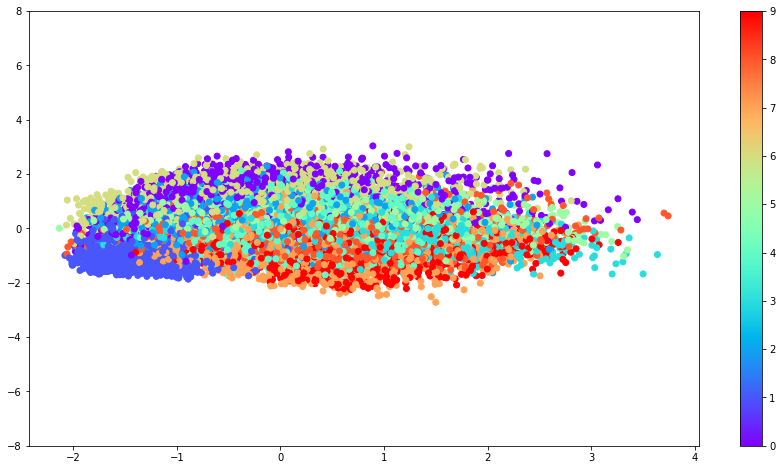

In [9]:
draw_pca(data_flatted_x, data_flatted_y)